Position Encoding 

This notebook will code positional encoding for the transformer neural networks with PyTorch


In [34]:
pip3 install torch
pip3 install numpy
pip3 install matplotlib

SyntaxError: invalid syntax (1672754786.py, line 1)

In [35]:
import torch
import torch.nn as nn

max_sequence_length = 10          # the length of the input sequence
d_model     = 6                   # model dimesion i.e., 512

We can rewrite these as 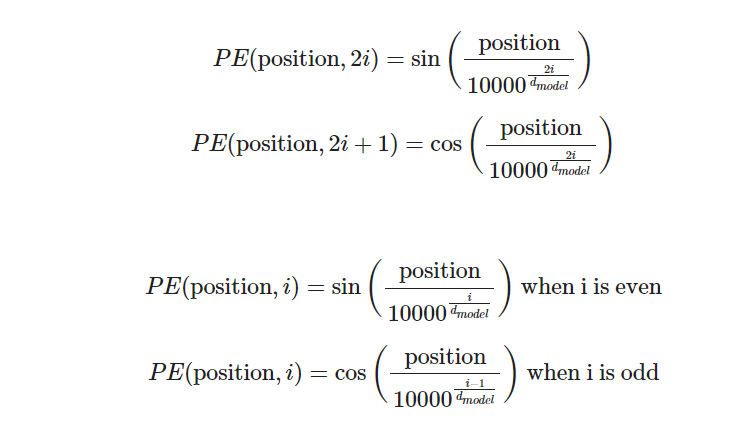

In [36]:
even_i = torch.arange(0, d_model, 2).float()
even_i

tensor([0., 2., 4.])

In [37]:
even_denominator = torch.pow(10000, even_i/d_model)
even_denominator

tensor([  1.0000,  21.5443, 464.1590])

In [38]:
odd_i = torch.arange(1, d_model, 2).float()
odd_i

tensor([1., 3., 5.])

In [39]:
odd_denominator = torch.pow(10000, (odd_i - 1)/d_model)
odd_denominator

tensor([  1.0000,  21.5443, 464.1590])

Even denominator and Odd denominator are the same! So we can just do one of these actions and call the resulting variable denominator

In [40]:
denominator = even_denominator

In [41]:
position = torch.arange(max_sequence_length, dtype=torch.float).reshape(max_sequence_length, 1) # reshapes to a 2D matrix with the second dimension as 1

In [42]:
position

tensor([[0.],
        [1.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])

In [43]:
even_PE = torch.sin(position / denominator) #Position encoder for even index tokens
odd_PE = torch.cos(position / denominator)  #position encoder for odd indexed tokens

In [44]:
even_PE

tensor([[ 0.0000,  0.0000,  0.0000],
        [ 0.8415,  0.0464,  0.0022],
        [ 0.9093,  0.0927,  0.0043],
        [ 0.1411,  0.1388,  0.0065],
        [-0.7568,  0.1846,  0.0086],
        [-0.9589,  0.2300,  0.0108],
        [-0.2794,  0.2749,  0.0129],
        [ 0.6570,  0.3192,  0.0151],
        [ 0.9894,  0.3629,  0.0172],
        [ 0.4121,  0.4057,  0.0194]])

In [45]:
odd_PE

tensor([[ 1.0000,  1.0000,  1.0000],
        [ 0.5403,  0.9989,  1.0000],
        [-0.4161,  0.9957,  1.0000],
        [-0.9900,  0.9903,  1.0000],
        [-0.6536,  0.9828,  1.0000],
        [ 0.2837,  0.9732,  0.9999],
        [ 0.9602,  0.9615,  0.9999],
        [ 0.7539,  0.9477,  0.9999],
        [-0.1455,  0.9318,  0.9999],
        [-0.9111,  0.9140,  0.9998]])

In [47]:
odd_PE.shape


torch.Size([10, 3])

In [48]:
even_PE.shape

torch.Size([10, 3])

In [50]:
# with the two even_PE and odd_PE, We have to combine them in the way that we get 0.0000 for the 1st index from even_PE and 1.0000 for the 2nd index from 
#the odd_PE and 0.8415 for the 3rd index from the even_PE like that like that 
stacked = torch.stack([even_PE, odd_PE], dim=2)

stacked.shape

torch.Size([10, 3, 2])

In [51]:
stacked

tensor([[[ 0.0000,  1.0000],
         [ 0.0000,  1.0000],
         [ 0.0000,  1.0000]],

        [[ 0.8415,  0.5403],
         [ 0.0464,  0.9989],
         [ 0.0022,  1.0000]],

        [[ 0.9093, -0.4161],
         [ 0.0927,  0.9957],
         [ 0.0043,  1.0000]],

        [[ 0.1411, -0.9900],
         [ 0.1388,  0.9903],
         [ 0.0065,  1.0000]],

        [[-0.7568, -0.6536],
         [ 0.1846,  0.9828],
         [ 0.0086,  1.0000]],

        [[-0.9589,  0.2837],
         [ 0.2300,  0.9732],
         [ 0.0108,  0.9999]],

        [[-0.2794,  0.9602],
         [ 0.2749,  0.9615],
         [ 0.0129,  0.9999]],

        [[ 0.6570,  0.7539],
         [ 0.3192,  0.9477],
         [ 0.0151,  0.9999]],

        [[ 0.9894, -0.1455],
         [ 0.3629,  0.9318],
         [ 0.0172,  0.9999]],

        [[ 0.4121, -0.9111],
         [ 0.4057,  0.9140],
         [ 0.0194,  0.9998]]])

In [52]:
PE = torch.flatten(stacked, start_dim=1, end_dim=2) # THIS GIVES YOU THE pOSITION ENCODNGS FOR EACH WORD
PE

tensor([[ 0.0000,  1.0000,  0.0000,  1.0000,  0.0000,  1.0000],
        [ 0.8415,  0.5403,  0.0464,  0.9989,  0.0022,  1.0000],
        [ 0.9093, -0.4161,  0.0927,  0.9957,  0.0043,  1.0000],
        [ 0.1411, -0.9900,  0.1388,  0.9903,  0.0065,  1.0000],
        [-0.7568, -0.6536,  0.1846,  0.9828,  0.0086,  1.0000],
        [-0.9589,  0.2837,  0.2300,  0.9732,  0.0108,  0.9999],
        [-0.2794,  0.9602,  0.2749,  0.9615,  0.0129,  0.9999],
        [ 0.6570,  0.7539,  0.3192,  0.9477,  0.0151,  0.9999],
        [ 0.9894, -0.1455,  0.3629,  0.9318,  0.0172,  0.9999],
        [ 0.4121, -0.9111,  0.4057,  0.9140,  0.0194,  0.9998]])